![img](./assets/structure_of_cnn_for_cifar10.jpeg)

In [3]:
from keras.src.datasets import cifar10
import numpy as np

np.random.seed(10)

In [6]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 65s 0us/step


In [7]:
print("train data: ", "images:", x_img_train.shape, " labels:", y_label_train.shape)
print("test data: ", "images:", x_img_test.shape, " labels:", y_label_test.shape)

train data:  images: (50000, 32, 32, 3)  labels: (50000, 1)
test data:  images: (10000, 32, 32, 3)  labels: (10000, 1)


In [8]:
x_img_train_normalize = x_img_train.astype("float32")
x_img_test_normalize = x_img_test.astype("float32")

In [9]:
from keras.src import utils

y_label_train_OneHot = utils.to_categorical(y_label_train)
y_label_test_OneHot = utils.to_categorical(y_label_test)

In [10]:
from keras.src.models import Sequential
from keras.src.layers import Dense, Dropout, Activation, Flatten
from keras.src.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation="relu",
                 padding="same"))

/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/tensorflow-plus-keras-PjLLcQ39-py3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Dropout(rate=0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=128,
                          verbose=1)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.1411 - loss: 33.1373 - val_accuracy: 0.2696 - val_loss: 2.0243
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.2722 - loss: 2.0180 - val_accuracy: 0.3709 - val_loss: 1.8180
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3577 - loss: 1.7460 - val_accuracy: 0.4323 - val_loss: 1.6857
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.4082 - loss: 1.6192 - val_accuracy: 0.4713 - val_loss: 1.5888
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.4420 - loss: 1.5307 - val_accuracy: 0.4995 - val_loss: 1.4977
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.4874 - loss: 1.4257 - val_accuracy: 0.5364 - val_loss: 1.4074
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.5244 - loss: 1.3354 - val_accuracy: 0.5451 - val_loss: 1.3791
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.5490 - loss: 1.2630 -

In [24]:
import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

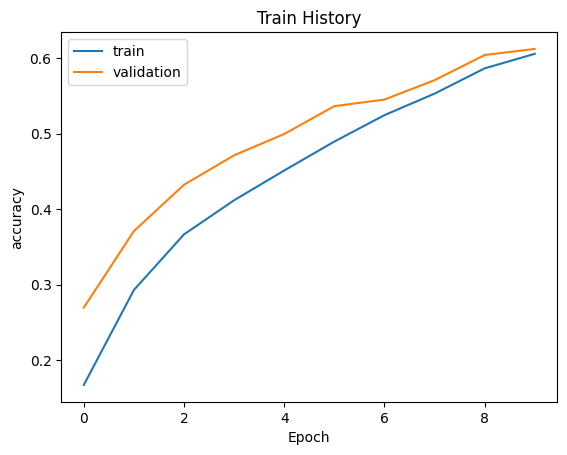

In [25]:
show_train_history(train_history, "accuracy", "val_accuracy")

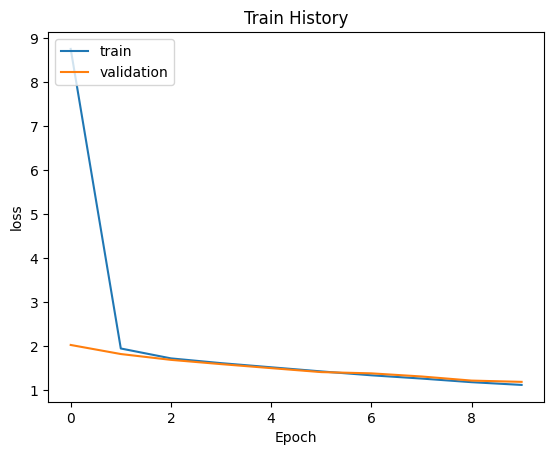

In [26]:
show_train_history(train_history, "loss", "val_loss")

In [27]:
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot,
                        verbose=0)
scores[1]

0.6105999946594238

In [29]:
predictions = model.predict(x_img_test_normalize)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([3, 1, 8, 8, 6, 6, 3, 6, 3, 1])

In [30]:
def plot_images_labels_prediction(image, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(image[idx], cmap="binary")
        title = "label = " + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

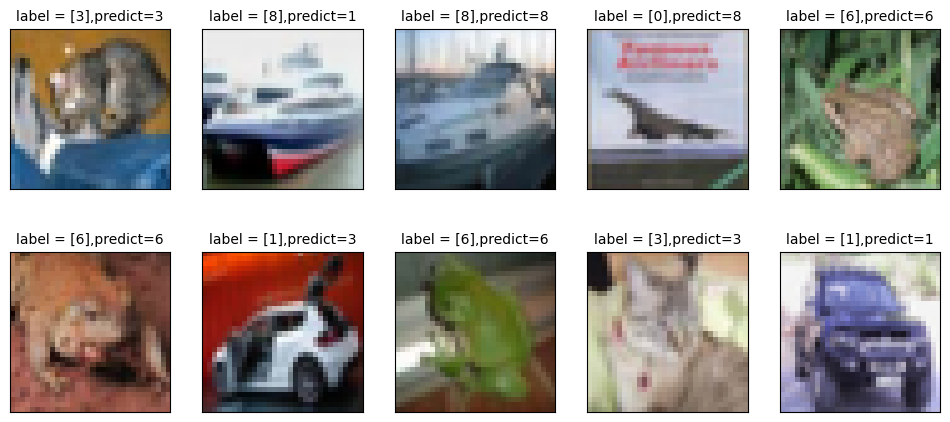

In [31]:
plot_images_labels_prediction(x_img_test, y_label_test, predicted_classes, 0, 10)

In [32]:
Predicted_Probability = model.predict(x_img_test_normalize)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
# 定义 CIFAR-10 的标签字典
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [41]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print("label:", label_dict[y[i][0]],
          "predict", label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + " Probability:%1.9f" % (Predicted_Probability[i][j]))

label: cat predict cat


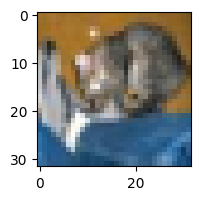

airplane Probability:0.051617708
automobile Probability:0.082084015
bird Probability:0.064571165
cat Probability:0.302429497
deer Probability:0.108292982
dog Probability:0.180714622
frog Probability:0.084676400
horse Probability:0.041137073
ship Probability:0.032911535
truck Probability:0.051564928


In [42]:
show_Predicted_Probability(y_label_test, predicted_classes, x_img_test, Predicted_Probability, 0)

label: airplane predict ship


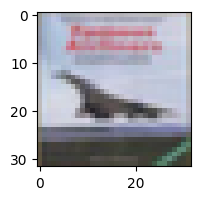

airplane Probability:0.176469252
automobile Probability:0.072110236
bird Probability:0.033120017
cat Probability:0.003788733
deer Probability:0.015786689
dog Probability:0.003241221
frog Probability:0.002274876
horse Probability:0.003847177
ship Probability:0.642492712
truck Probability:0.046869110


In [43]:
show_Predicted_Probability(y_label_test, predicted_classes, x_img_test, Predicted_Probability, 3)

In [44]:
predicted_classes.shape

(10000,)

In [45]:
y_label_test.shape

(10000, 1)

In [46]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [47]:
import pandas as pd

print(label_dict)
pd.crosstab(y_label_test.reshape(-1),
            predicted_classes,
            rownames=["label"],
            colnames=["predict"])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,547,26,70,29,55,7,29,5,124,108
1,6,701,5,16,2,4,16,1,19,230
2,35,7,489,127,125,59,99,22,16,21
3,11,14,51,553,78,94,139,20,8,32
4,13,12,81,105,578,27,114,50,11,9
5,1,4,44,379,77,354,86,37,2,16
6,3,8,31,68,70,11,790,2,3,14
7,6,5,15,126,100,72,33,573,7,63
8,50,70,24,35,23,5,14,0,704,75


## 建立3次的卷积运算神经网络

![img](./assets/3_times_cnn_structure.jpeg)

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation="relu",
                 padding="same"))
model.add(Dropout(0.3))
# 增加Conv2D层
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))
model.add(Dropout(0.3))
# 增加Conv2D层
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [55]:
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))
model.add(Dropout(0.3))
# 增加Conv2D层
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation="relu",
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [56]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1500, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

In [61]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [71]:
try:
    model.load_weights("SaveModel/cifarCnnModel.weights.h5")
    print("Load Model Successfully! Continue to Train Model!")
except:
    print("Failed to Load Model! Train a New Model!")

Load Model Successfully! Continue to Train Model!


In [72]:
train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=5,
                          batch_size=128,
                          verbose=1)

Epoch 1/5
255/313 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - accuracy: 0.5898 - loss: 1.1552

KeyboardInterrupt: 

In [68]:
model.save_weights("SaveModel/cifarCnnModel.weights.h5")
print("Saved Model to Disk.")

Saved Model to Disk.


In [70]:
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot,
                        verbose=0)
scores[1]

0.54830002784729